Aim : Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.random.seed(20)
X = np.linspace(-7, 7, 100)  # 100 points evenly spaced between -3 and 3
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)  # Sine wave with noise

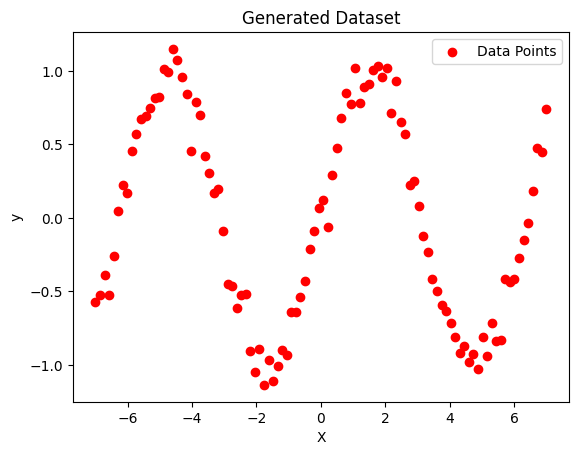

In [10]:
plt.scatter(X, y, color='red', label='Data Points')
plt.title('Generated Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
def get_weights(X, query_point, tau):
    m = X.shape[0]
    weights = np.eye(m)
    for i in range(m):
        diff = query_point - X[i]
        weights[i, i] = np.exp(-(diff ** 2) / (2 * tau ** 2))
    return weights

def locally_weighted_linear_regression(X, y, query_point, tau):
    X_ = np.vstack((np.ones(len(X)), X)).T  
    query_point_ = np.array([1, query_point]) 
    
    weights = get_weights(X, query_point, tau)
    
    theta = np.linalg.pinv(X_.T @ weights @ X_) @ (X_.T @ weights @ y)
    return query_point_ @ theta


# Prediction over the entire dataset
def predict_lwlr(X, y, tau):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        y_pred[i] = locally_weighted_linear_regression(X, y, X[i], tau)
    return y_pred

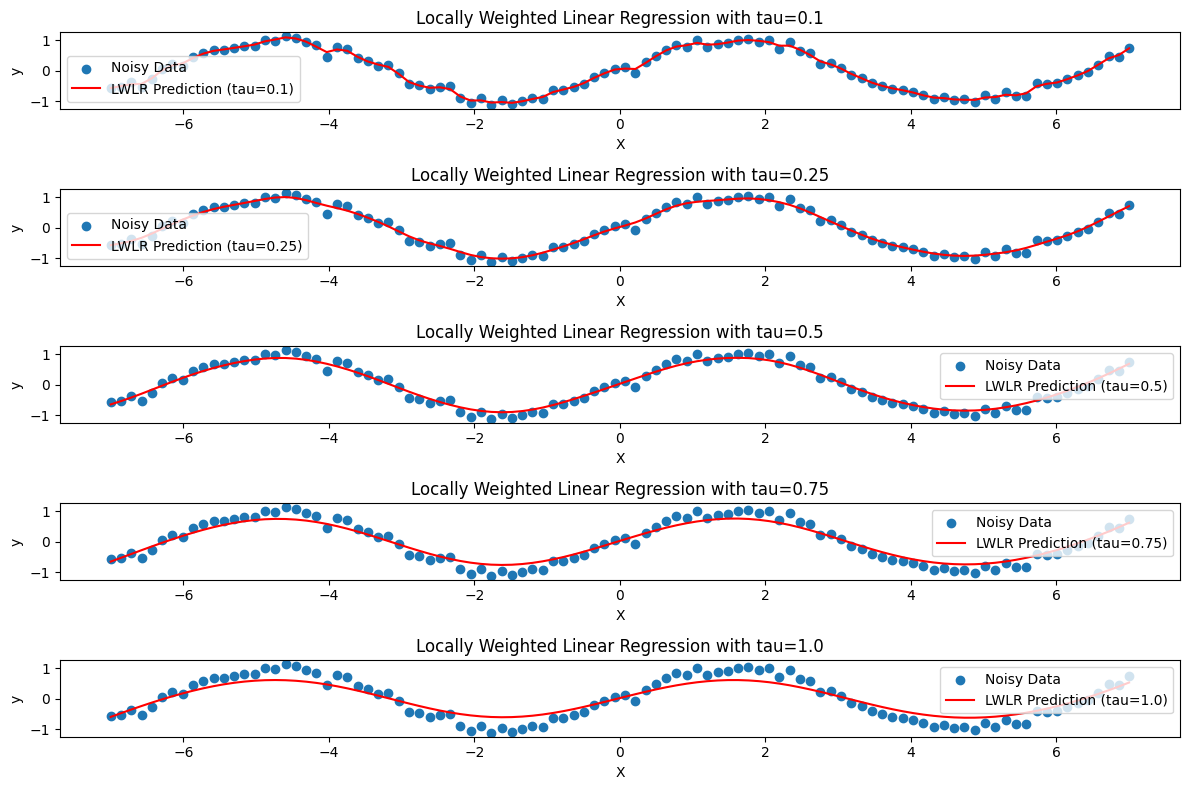

In [15]:
taus = [0.1, 0.25, 0.5, 0.75, 1.0]
plt.figure(figsize=(12, 8))

for i, tau in enumerate(taus):
    y_pred = predict_lwlr(X, y, tau)
    plt.subplot(5, 1, i + 1)  #subplot for each tau
    plt.scatter(X, y, label='Noisy Data')
    plt.plot(X, y_pred, color='red', label=f'LWLR Prediction (tau={tau})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Locally Weighted Linear Regression with tau={tau}')

plt.tight_layout()
plt.show()

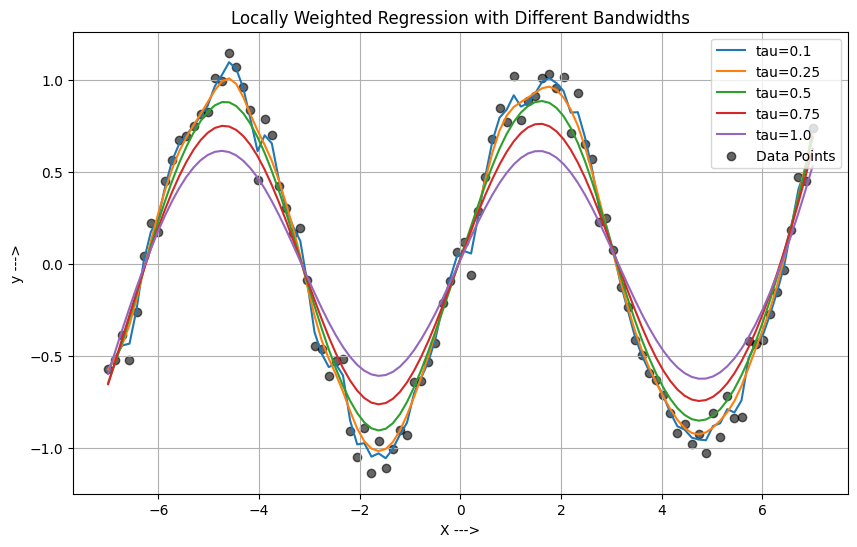

In [24]:
taus = [0.1, 0.25, 0.5, 0.75, 1.0]
query_points = X

plt.figure(figsize=(10, 6))
for tau in taus:
    predictions = [locally_weighted_linear_regression(X, y, qp, tau) for qp in query_points]
    plt.plot(query_points, predictions, label=f'tau={tau}')

plt.scatter(X, y, color='black', label='Data Points', alpha=0.6)

plt.title('Locally Weighted Regression with Different Bandwidths')
plt.xlabel('X --->')
plt.ylabel('y --->')
plt.legend()
plt.grid(True)
plt.show()